2023-10-08

BBME 520

Assignment 5

Javid Jannat

In [1]:
import numpy as np 
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
import sklearn
from matplotlib import pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)

output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype= np.short) #gives 1 for females and 0 for males

data_n = output_variable.size
sets_n = 10

input_variables = [None]*sets_n

for i in range(sets_n):

    ROIS = (i+1)*100

    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=ROIS)
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps)

dims = np.zeros(sets_n)
for i in range(sets_n):
    dims[i] = input_variables[i].shape[1]

C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [2]:
#Task 1

accuracies = np.zeros((2,sets_n))
EIGHTY = round(data_n*0.8)


for i,input in enumerate(input_variables):
    model_logreg = sklearn.linear_model.LogisticRegression(penalty='l2',C=1.0 , max_iter= 10000).fit(input[:EIGHTY],output_variable[:EIGHTY])
    model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5).fit(input[:EIGHTY],output_variable[:EIGHTY])

    accuracy_logreg = sum(model_logreg.predict(input[EIGHTY:]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracy_KNN = sum(model_KNN.predict(input[EIGHTY:]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size

    accuracies[0,i]=accuracy_logreg
    accuracies[1,i]=accuracy_KNN

accuracies*=100

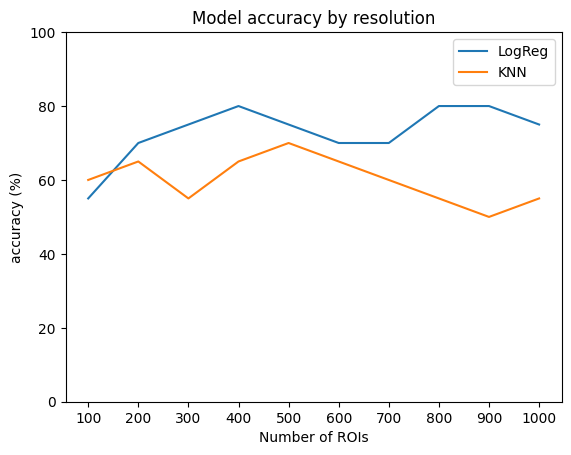

In [3]:
plt.title('Model accuracy by resolution');
plt.plot(np.arange(sets_n), accuracies.transpose());
plt.legend(['LogReg','KNN']);
plt.ylim([0,100]);
plt.xticks(np.arange(sets_n),np.arange(100,1100,100));
plt.xlabel('Number of ROIs');
plt.ylabel('accuracy (%)');

In [4]:
#Task 2

accuracies = np.zeros((10))
EIGHTY = round(data_n*0.8)
input = input_variables[0]

for i in range(10):
    model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i+1).fit(input[:EIGHTY],output_variable[:EIGHTY])

    accuracy_KNN = sum(model_KNN.predict(input[EIGHTY:]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size

    accuracies[i]=accuracy_KNN

accuracies*=100

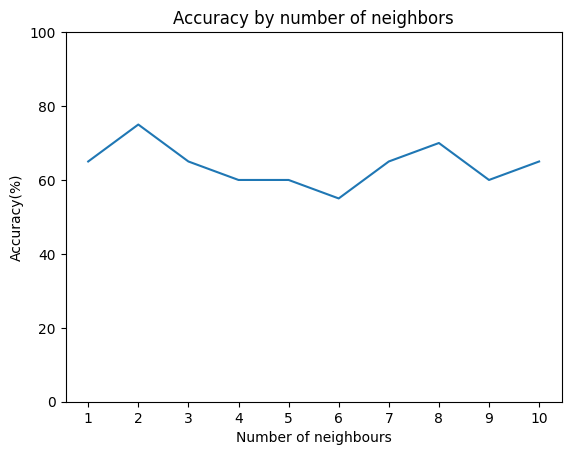

In [5]:
plt.plot(np.arange(1,11),accuracies);
plt.title('Accuracy by number of neighbors')
plt.ylabel("Accuracy(%)")
plt.xlabel('Number of neighbours');
plt.ylim([0,100]);
plt.xticks(np.arange(1,11));


In [6]:
#Task 3

accuracies = np.zeros((10))
input = input_variables[0]

for i in range(10):
    model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i+1).fit(input,output_variable)

    accuracy_KNN = sum(model_KNN.predict(input) == output_variable)/output_variable.size

    accuracies[i]=accuracy_KNN

accuracies*=100

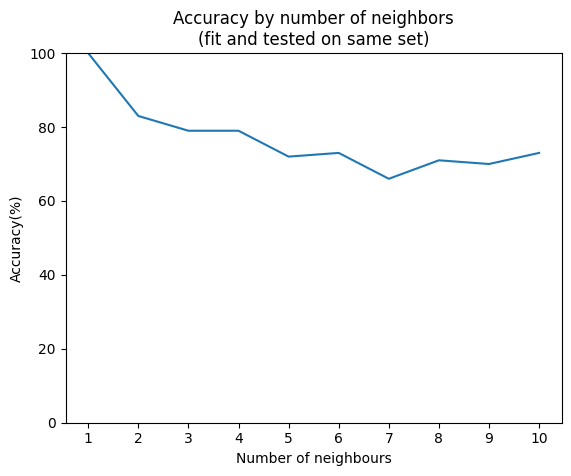

In [7]:
plt.plot(np.arange(1,11),accuracies);
plt.title('Accuracy by number of neighbors\n(fit and tested on same set)')
plt.ylabel("Accuracy(%)")
plt.xlabel('Number of neighbours');
plt.ylim([0,100]);
plt.xticks(np.arange(1,11));

In k=1, the accuracy is 100% since the nearest datapoint in the training set it the test data point itself. As k increases, the accuracy approaches the male:female ratio. It approaches max(m,f)/(m+f) to be exact.

In [8]:
#Task 4

accuracies = np.zeros((2,8))
input = input_variables[0]

indices = np.round(data_n*np.arange(0.1,0.9,0.1)).astype(np.short)
EIGHTY = round(data_n*0.8)


for i,j in enumerate(indices):
    model_logreg = sklearn.linear_model.LogisticRegression(penalty='l2',C=1.0 , max_iter= 10000).fit(input[:j],output_variable[:j])
    model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3).fit(input[:j],output_variable[:j])

    accuracy_logreg = sum(model_logreg.predict(input[EIGHTY:]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracy_KNN = sum(model_KNN.predict(input[EIGHTY:]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size

    accuracies[0,i]=accuracy_logreg
    accuracies[1,i]=accuracy_KNN

accuracies = np.round(accuracies*100,2)

Accuracy vs proportion of training data used table 


Percentage of training data used	|	Accuracy Logreg (%)	|	 Accuracy KNN (%)
----------------------------------------------------------------------------------------------------
		 10 			|		 65.0 		|		 75.0
		 20 			|		 75.0 		|		 85.0
		 30 			|		 65.0 		|		 80.0
		 40 			|		 90.0 		|		 70.0
		 50 			|		 75.0 		|		 60.0
		 60 			|		 75.0 		|		 60.0
		 70 			|		 75.0 		|		 60.0
		 80 			|		 55.0 		|		 65.0


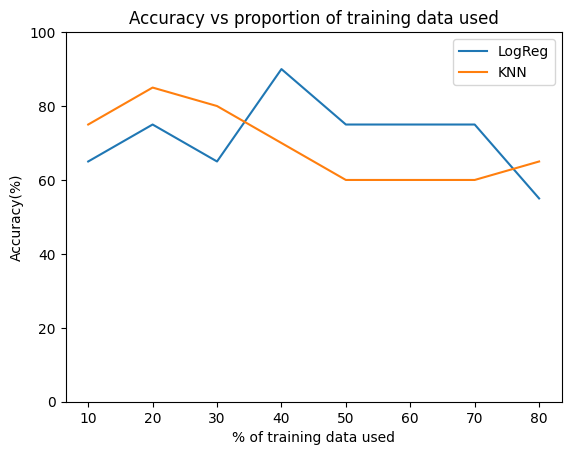

In [9]:
plt.plot(np.arange(1,9),accuracies.transpose());
plt.legend(['LogReg','KNN']);
plt.title('Accuracy vs proportion of training data used')
plt.ylabel("Accuracy(%)")
plt.xlabel('% of training data used');
plt.ylim([0,100]);
plt.xticks(np.arange(1,9),np.arange(1,9)*10);

print('Accuracy vs proportion of training data used table \n\n')

print("Percentage of training data used\t|\tAccuracy Logreg (%)\t|\t Accuracy KNN (%)")
print('-'*100)
for i in range(8):
    print('\t\t',(i+1)*10,'\t'*3+'|\t\t',accuracies[0,i],'\t\t|\t\t',accuracies[1,i])


In [10]:
#Task 5

accuracies = np.zeros((2,10))
input = input_variables[0]

indices = np.round(input.shape[1]*np.arange(0.1,1.1,0.1)).astype(np.short)
EIGHTY = round(data_n*0.8)


for i,j in enumerate(indices):
    model_logreg = sklearn.linear_model.LogisticRegression(penalty='l2',C=1.0 , max_iter= 10000).fit(input[:EIGHTY,:j],output_variable[:EIGHTY])
    model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3).fit(input[:EIGHTY,:j],output_variable[:EIGHTY])

    accuracy_logreg = sum(model_logreg.predict(input[EIGHTY:,:j]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracy_KNN = sum(model_KNN.predict(input[EIGHTY:,:j]) == output_variable[EIGHTY:])/output_variable[EIGHTY:].size

    accuracies[0,i]=accuracy_logreg
    accuracies[1,i]=accuracy_KNN

accuracies=np.round(accuracies*100,2)

Accuracy vs percentage of dimentions used table 


Percentage of dimentions used		|	Accuracy Logreg (%)	|	 Accuracy KNN (%)
----------------------------------------------------------------------------------------------------
		 10 			|		 40.0 		|		 70.0
		 20 			|		 55.0 		|		 60.0
		 30 			|		 60.0 		|		 80.0
		 40 			|		 50.0 		|		 60.0
		 50 			|		 60.0 		|		 75.0
		 60 			|		 55.0 		|		 75.0
		 70 			|		 65.0 		|		 60.0
		 80 			|		 55.0 		|		 60.0
		 90 			|		 65.0 		|		 70.0
		 100 			|		 55.0 		|		 65.0


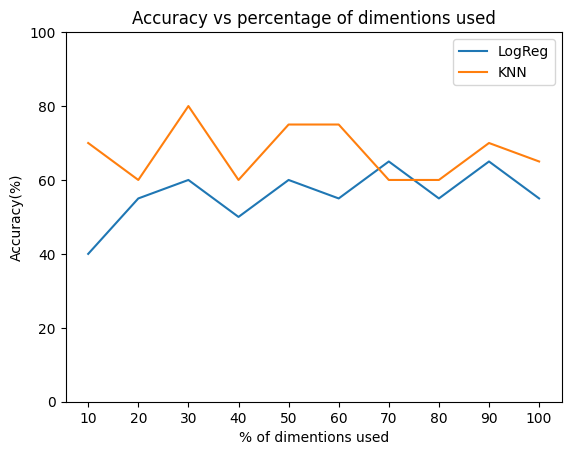

In [11]:
plt.plot(np.arange(1,11),accuracies.transpose());
plt.legend(['LogReg','KNN']);
plt.title('Accuracy vs percentage of dimentions used')
plt.ylabel("Accuracy(%)")
plt.xlabel('% of dimentions used');
plt.ylim([0,100]);
plt.xticks(np.arange(1,11),np.arange(1,11)*10);

print('Accuracy vs percentage of dimentions used table \n\n')

print("Percentage of dimentions used\t\t|\tAccuracy Logreg (%)\t|\t Accuracy KNN (%)")
print('-'*100)
for i in range(10):
    print('\t\t',(i+1)*10,'\t'*3+'|\t\t',accuracies[0,i],'\t\t|\t\t',accuracies[1,i])